In [1]:
import os
import subprocess
import sys
sys.path.insert(1, os.path.abspath('../tools'))

import numpy as np
from scipy.interpolate import interp1d
import zipfile
import pylhe
from scipy.interpolate import make_interp_spline
from AnalysisMG5 import Analysis
from decayChainAnalytic import getAvgGammaBeta
from decayChainAnalytic import getDecayGammaBeta
from decayChainAnalytic import velocity
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import json 
import seaborn as sns

#plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution
plt.rcParams['figure.figsize'] = (8,7)


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
def fromFile(inputFile):
#function to read files originating from calcAvgDsvNumgb.

    evList = []
    f = open(inputFile, 'r')
    data = f.read()
    decayBlock = data.split("[")
    decayBlocks = [d.split("]") for d in decayBlock if d.strip()] #GammaBetas for decay chain.
    for i, b in enumerate(decayBlocks):
        evList.append(Event(blockStr=b))
    return np.array(evList)

def Event(blockStr):
    lines = [d.split("\n") for d in blockStr if d.strip()]
    gammabl = []
    for l in lines[:]:
        gammab = [eval(x) for x in l[0].split(",")]
        gammabl.append(gammab)
    return np.array(gammabl)


In [3]:
# File paths containing the MadGraph output
madGraphOutput = './validation_data/GammaBeta_2C_n30000.dat' #2-body
# madGraphOutput = './validation_data/GammaBeta_spinhalf_n20000.dat' # Spin 1/2
# madGraphOutput = './validation_data/GammaBeta_spin0_Analise.dat' # Spin 0
# madGraphOutput = './validation_data/GammaBeta_3C_Analise.dat' # 3_Corpos  
# madGraphOutput = './validation_data/GammaBeta_T-chanel_n10000.dat' # T-Chanel  
# madGraphOutput = './validation_data/GammaBeta_spinmeioW_n20000.dat' # Massive SM Particule  
# madGraphOutput = './validation_data/GammaBeta_3D_Go_n30000.dat' # 2-steps Decay  
# madGraphOutput = './validation_data/GammaBeta_3D_H_n40000.dat' # 2-steps Decay Massive SM Particule  

In [4]:
# Load gamma betas
GB=fromFile(madGraphOutput)

## Fetch GammaBetas for each decay step

In [8]:
GammaBeta0 = GB[:,0,0]
GammaBeta1 = []
GammaBeta2 = []

if GB.shape[2] > 1:
    GammaBeta1 = GB[:,0,1]
if GB.shape[2] > 2:
    GammaBeta2 = GB[:,0,2]    

## Compute boosts using the analytical approximation:

In [26]:
GammaBeta0Ana = []
GammaBeta1Ana = []
Velocity0 = []
Velocity1 = []
porMXM1 = []
MXT = []
M1T = []
difMass = []

import time
t0 = time.time()
timeList = []
contador=0
MXList = np.arange(300,4051,60)
for MX in MXList:
    M1list = np.linspace(100,(MX-10),6)
    for i,M1 in enumerate(M1list):
        #M=((MX-M1)/2)
        M=0
        GB = getAvgGammaBeta(Ms=[(MX,0),(M1,M)],TIPOFUNC='VGO',computeStd=False)
        GammaBeta0Ana.append(GB[0])
        GammaBeta1Ana.append(GB[1])
        Velocity0.append(GB[0][0]/(np.sqrt(1+GB[0][0]**2)))
        Velocity1.append(GB[1][0]/(np.sqrt(1+GB[1][0]**2)))
        MXT.append(MX)
        M1T.append(M1)
        porMXM1.append(M1/MX)
        difMass.append(MX-M1)

## Gerar os eventos Massive SM Particule, 2-Steps Decay

In [69]:
GammaBeta0Ana = []
GammaBeta1Ana = []
GammaBeta2Ana = []
Velocity0 = []
Velocity1 = []
porMXM1 = []
porM1M2 = []
MXT = []
M1T = []
M2T = []


import time
t0 = time.time()
timeList = []
contador=0
MXList = np.arange(300,4050,100)
for MX in MXList:
    M1list = np.linspace(200,(MX-80),4)
    for M1 in M1list:
        M2list = np.linspace(80,(M1-100),4)
        for M2 in M2list:
            GB = getAvgGammaBeta(Ms=[(MX,0),(M1,80),(M2,90)],TIPOFUNC='VH')
            GammaBeta0Ana.append(GB[0])
            GammaBeta1Ana.append(GB[1])
            GammaBeta2Ana.append(GB[2])
            Velocity0.append(GB[0][0]/(np.sqrt(1+GB[0][0]**2)))
            Velocity1.append(GB[1][0]/(np.sqrt(1+GB[1][0]**2)))
            MXT.append(MX)
            M1T.append(M1)
            M2T.append(M2)
            porMXM1.append(M1/MX)
            porM1M2.append(M2/M1)

## Gerar os eventos spin 0

In [11]:
GammaBeta0Ana = []
GammaBeta1Ana = []
Velocity0 = []
Velocity1 = []
porMXM1 = []
MXT = []
M1T = []
difMass = []

import time
t0 = time.time()
timeList = []
contador=0
MXList = np.arange(300,4051,60)
for MX in MXList:
    M1list = np.linspace(100,MX-10,6)
    for M1 in M1list:
        #M=((MX-M1)/2)
        M=0
        GB = getAvgGammaBeta(Ms=[(MX,0),(M1,M)],TIPOFUNC='VANA',computeStd=False)
        GammaBeta0Ana.append(GB[0])
        GammaBeta1Ana.append(GB[1])
        Velocity0.append(GB[0][0]/(np.sqrt(1+GB[0][0]**2)))
        Velocity1.append(GB[1][0]/(np.sqrt(1+GB[1][0]**2)))
        MXT.append(MX)
        M1T.append(M1)
        porMXM1.append(M1/MX)
        difMass.append(MX-M1)

## Gerar os eventos 3-corpos

In [20]:
GammaBeta0Ana = []
GammaBeta1Ana = []
Velocity0 = []
Velocity1 = []
porMXM1 = []
MXT = []
M1T = []
difMass = []

import time
t0 = time.time()
timeList = []
contador=0
MXList = np.arange(300,4051,60)
for MX in MXList:
    M1list = np.linspace(100,(MX-10),6)
    for i,M1 in enumerate(M1list):
        M=((MX-M1)/2)
        #M=0
        GB = getAvgGammaBeta(Ms=[(MX,0),(M1,M)],TIPOFUNC='VGO',computeStd=False)
        GammaBeta0Ana.append(GB[0])
        GammaBeta1Ana.append(GB[1])
        Velocity0.append(GB[0][0]/(np.sqrt(1+GB[0][0]**2)))
        Velocity1.append(GB[1][0]/(np.sqrt(1+GB[1][0]**2)))
        MXT.append(MX)
        M1T.append(M1)
        porMXM1.append(M1/MX)
        difMass.append(MX-M1)

## Gerar os eventos spin 1/2

In [34]:
GammaBeta0Ana = []
GammaBeta1Ana = []
Velocity0 = []
Velocity1 = []
porMXM1 = []
MXT = []
M1T = []
difMass = []

import time
t0 = time.time()
timeList = []
contador=0
MXList = np.arange(300,4051,60)
for MX in MXList:
    M1list = np.linspace(100,(MX-10),6)
    for i,M1 in enumerate(M1list):
        #M=((MX-M1)/2)
        M=0
        GB = getAvgGammaBeta(Ms=[(MX,0),(M1,M)],TIPOFUNC='VANA',computeStd=False)
        GammaBeta0Ana.append(GB[0])
        GammaBeta1Ana.append(GB[1])
        Velocity0.append(GB[0][0]/(np.sqrt(1+GB[0][0]**2)))
        Velocity1.append(GB[1][0]/(np.sqrt(1+GB[1][0]**2)))
        MXT.append(MX)
        M1T.append(M1)
        porMXM1.append(M1/MX)
        difMass.append(MX-M1)

## Gerar os eventos T-Chanel

In [60]:
GammaBeta0Ana = []
GammaBeta1Ana = []
Velocity0 = []
Velocity1 = []
porMXM1 = []
MXT = []
M1T = []
difMass = []

import time
t0 = time.time()
timeList = []
contador=0
MXList = np.arange(300,4051,60)
for MX in MXList:
    M1list = np.linspace(100,(MX-10),6)
    for i,M1 in enumerate(M1list):
        #M=((MX-M1)/2)
        M=0
        GB = getAvgGammaBeta(Ms=[(MX,0),(M1,M)],TIPOFUNC='VUR',computeStd=False)
        GammaBeta0Ana.append(GB[0])
        GammaBeta1Ana.append(GB[1])
        Velocity0.append(GB[0][0]/(np.sqrt(1+GB[0][0]**2)))
        Velocity1.append(GB[1][0]/(np.sqrt(1+GB[1][0]**2)))
        MXT.append(MX)
        M1T.append(M1)
        porMXM1.append(M1/MX)
        difMass.append(MX-M1)

## Gerar os eventos Massive SM Particule

In [51]:
GammaBeta0Ana = []
GammaBeta1Ana = []
Velocity0 = []
Velocity1 = []
porMXM1 = []
MXT = []
M1T = []
difMass = []

import time
t0 = time.time()
timeList = []
contador=0
MXList = np.arange(300,4051,60)
for MX in MXList:
    M1list = np.linspace(80,(MX-100),6)
    for i,M1 in enumerate(M1list):
        #M=((MX-M1)/2)
        M=0
        GB = getAvgGammaBeta(Ms=[(MX,0),(M1,M)],TIPOFUNC='VX',computeStd=False)
        GammaBeta0Ana.append(GB[0])
        GammaBeta1Ana.append(GB[1])
        Velocity0.append(GB[0][0]/(np.sqrt(1+GB[0][0]**2)))
        Velocity1.append(GB[1][0]/(np.sqrt(1+GB[1][0]**2)))
        MXT.append(MX)
        M1T.append(M1)
        porMXM1.append(M1/MX)
        difMass.append(MX-M1)

## Gerar os eventos 2 Steps decay

In [55]:
GammaBeta0Ana = []
GammaBeta1Ana = []
GammaBeta2Ana = []
Velocity0 = []
Velocity1 = []
porMXM1 = []
porM1M2 = []
MXT = []
M1T = []
M2T = []


import time
t0 = time.time()
timeList = []
contador=0
MXList = np.arange(300,4050,100)
for MX in MXList:
    M1list = np.linspace(200,(MX-80),4)
    for M1 in M1list:
        M2list = np.linspace(80,(M1-100),4)
        for M2 in M2list:
            GB = getAvgGammaBeta(Ms=[(MX,0),(M1,0),(M2,0)],TIPOFUNC='VGO')
            GammaBeta0Ana.append(GB[0])
            GammaBeta1Ana.append(GB[1])
            GammaBeta2Ana.append(GB[2])
            Velocity0.append(GB[0][0]/(np.sqrt(1+GB[0][0]**2)))
            Velocity1.append(GB[1][0]/(np.sqrt(1+GB[1][0]**2)))
            MXT.append(MX)
            M1T.append(M1)
            M2T.append(M2)
            porMXM1.append(M1/MX)
            porM1M2.append(M2/M1)

In [70]:
AGammaBeta0 = np.array(GammaBeta0)
AGammaBeta1 = np.array(GammaBeta1)
#AGammaBeta2 = np.array(GammaBeta2)
AGammaBeta0Ana = np.array(GammaBeta0Ana)
AGammaBeta1Ana = np.array(GammaBeta1Ana)
#AGammaBeta2Ana = np.array(GammaBeta2Ana)

In [71]:
dif1GB=abs(AGammaBeta1Ana[:,0]-AGammaBeta1)
por_difGB1=100*dif1GB/AGammaBeta1
VmomMG=AGammaBeta0/np.sqrt(1+AGammaBeta0**2)
VmomANA=Velocity0
difVmom = abs(VmomANA-VmomMG)
por_Vmom = 100*difVmom/VmomMG
velof1 = AGammaBeta1/np.sqrt(1+AGammaBeta1**2)
por_velof1=(abs(Velocity1-velof1)*100)/velof1

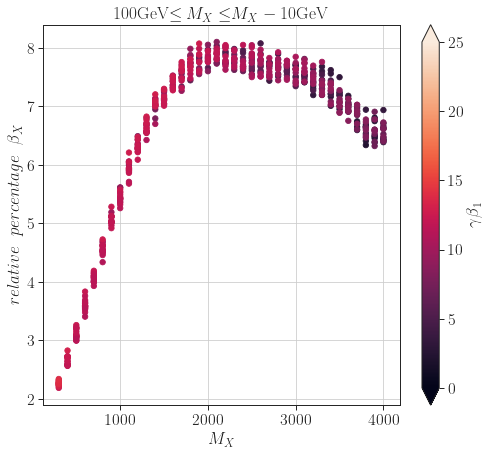

In [72]:
plt.scatter(MXT,por_Vmom,c=por_difGB1,s=30)
#cb = plt.colorbar()
#plt.imshow(por_dif1,interpolation='none',vmin=0,vmax=28)
cb = plt.colorbar(extend='both')
plt.clim(0,25);
cb.set_label(r'$\gamma \beta_1$')
plt.xlabel(r'$ M_{X}$')
plt.title(r'$100$'+'GeV'+r'$\leq M_X \leq$'+r'$M_X - 10$'+'GeV')
plt.ylabel(r'$relative \ \ percentage \ \ \beta_X$')
plt.grid(True)
#plt.savefig('3C_Mab_VAna.png', format='png')

In [73]:
dif2b=abs(AGammaBeta2Ana[:,0]-AGammaBeta2)
por_difGB2=100*dif2b/AGammaBeta2
velof2 = AGammaBeta2/np.sqrt(1+AGammaBeta2**2)

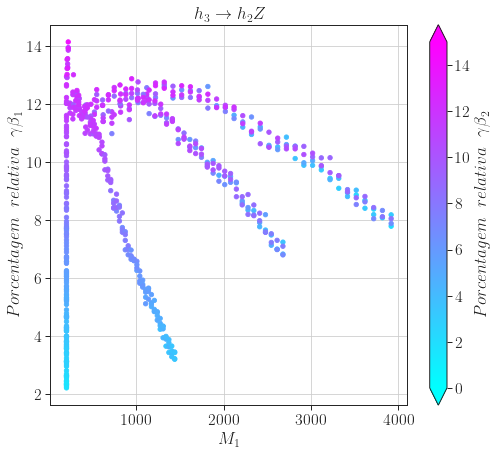

In [74]:
plt.scatter(M1T,por_difGB1,c=por_difGB2,s=20,cmap=mpl.cm.cool)
cb = plt.colorbar(extend='both')
plt.clim(0, 15);
cb.set_label(r'$Porcentagem \ \ relativa \ \ \gamma \beta_2$')
plt.xlabel(r'$M_{1}$')
plt.title(r'$h_3 \to h_2  Z $')
plt.rcParams['figure.figsize'] = (8,7)
plt.ylabel(r'$Porcentagem \ \ relativa \ \ \gamma \beta_1$')
plt.grid(True)
#plt.savefig('3D_2H_VH.png', format='png')